<a href="https://colab.research.google.com/github/sujithm21/MNIST-digits-classification/blob/main/MNIST_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing dependencies**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
from PIL import Image
from tensorflow import keras
tf.random.set_seed(3)
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

 **Loading mnist dataset from keras.datasets**



In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
type(x_train)
#shape of the numpy array
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
# (6000, 28, 28) signifies that x_train has 6000 images and each image of dimension 28x28 pixels
# greyscale images

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [ ]:
# Each image will be a n dimensional array of values ranging from (0,255)
print(x_train[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

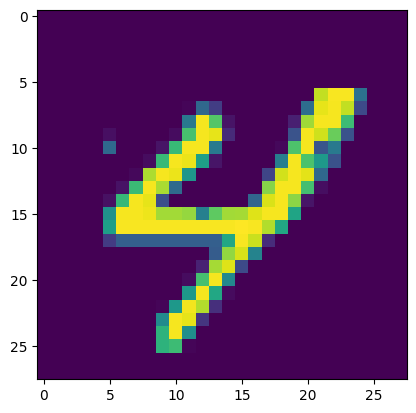

4


In [ ]:
# Displaying the image
plt.imshow(x_train[89])
plt.show()
# label of the image
print(y_train[89])
# since images are in uniform dimensios no need for processing them

**Getting some insights on the labels**

In [ ]:
print(y_train.shape, y_test.shape)

(60000,) (10000,)


In [ ]:
# Getting the unique lables
print(np.unique(y_train))
print(np.unique(y_test))
# If we want to do one hot encoding on labels we can do that

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [ ]:
# scaling the images or Normalization
# converting the range (0,255) -> (0,1)
x_train = x_train/255
x_test = x_test/255

In [ ]:
print(x_train[1])

**Building the Neural Network**

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [ ]:
# compiling the model
model.compile(optimizer ='adam', loss ='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Training the neural network
model.fit(x_train, y_train,)

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.3086 - accuracy: 0.9111
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1462 - accuracy: 0.9565
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1072 - accuracy: 0.9674
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0865 - accuracy: 0.9729
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0705 - accuracy: 0.9782
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0598 - accuracy: 0.9816
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0529 - accuracy: 0.9826
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0450 - accuracy: 0.9860
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0398 - accuracy: 0.9870
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.034

In [ ]:
# Evaluating the model
loss, accuracy = model.evaluate(x_test, y_test)
print("loss", loss)

313/313 [==============================] - 1s 4ms/step - loss: 0.1030 - accuracy: 0.9736
loss 0.10301967710256577


In [ ]:
print(y_test[0])

7


In [ ]:
y_pred = model.predict(x_test)


313/313 [==============================] - 2s 4ms/step


In [ ]:
print(y_pred.shape)

(10000, 10)


In [ ]:
# model.predict() gives the prdiction probability of each class for the data point
# so it gave 10 probabilities corresponding to 10 classes -> [0,1....,9]
print(y_pred[0])

[3.7972954e-05 2.5042038e-02 8.7250209e-01 9.8794669e-01 2.6862587e-08
 4.6625726e-02 9.3230494e-07 9.9999964e-01 4.1332301e-03 3.4856096e-02]


In [ ]:
# converting the probabilities to class labels
# argmax returs the index of the maximum value in the array
label_for_first_image = np.argmax(y_pred[0])
print(label_for_first_image)
# Therefore the seventh index has the maximun value so in this case the index is the class it belongs to

7


In [ ]:
# now converting all the probabilities to labels
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 4, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 4, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

**Confusin matrix**

In [ ]:
confusion_matrix1 = confusion_matrix(y_test, y_pred_labels)

In [ ]:
print(confusion_matrix1)

tf.Tensor(
[[ 963    1    1    1    0    3    4    3    4    0]
 [   0 1124    4    0    0    2    1    0    4    0]
 [   5    0 1005    6    5    0    2    5    4    0]
 [   0    0    4  984    0    4    0    5   11    2]
 [   2    0    2    0  962    3    3    3    2    5]
 [   2    1    0   14    3  858    2    2    7    3]
 [   3    2    1    0    3    9  935    1    4    0]
 [   1    5   11    2    3    0    0  997    2    7]
 [   1    1    2    7    5    6    1    3  945    3]
 [   2    3    0    3   22    3    0    8    5  963]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted labels')

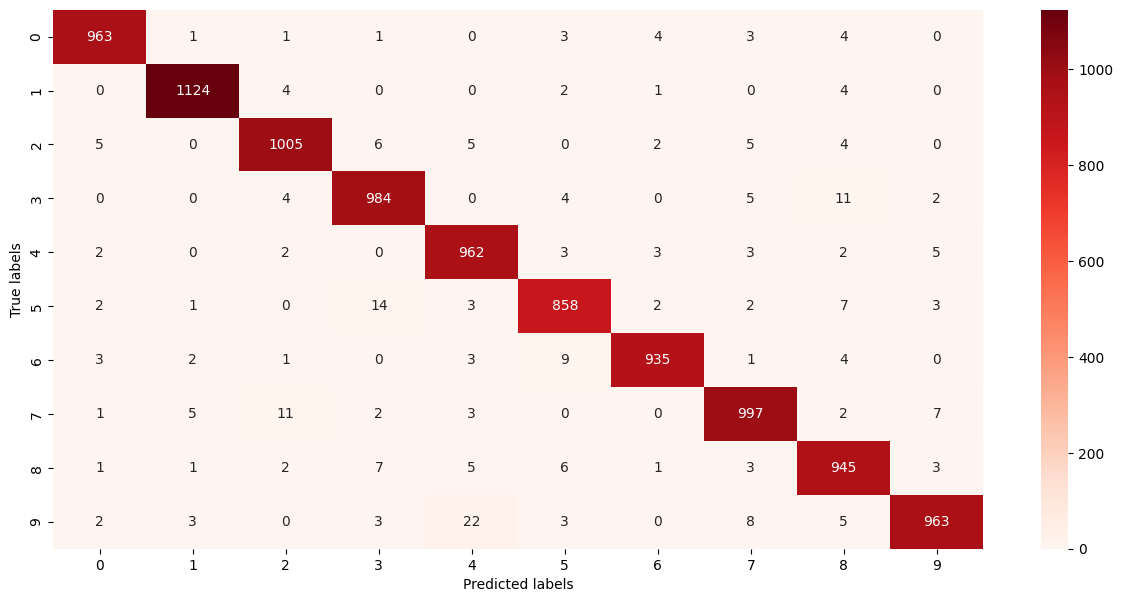

In [ ]:
# Heat map for the confusion matrix
plt.figure(figsize=(15,7))
sns.heatmap(confusion_matrix1, annot=True, fmt='d', cmap='Reds')
plt.ylabel('True labels')
plt.xlabel('Predicted labels')

**Prediction**

In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)

In [ ]:
# To convert any input image to Greyscale
# if we import
greyscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [ ]:
# To resize the input image
input_image_resize = cv2.resize(greyscale, (28, 28))

In [ ]:
# Normalize the input image
input_image_resize = input_image_resize/255

In [ ]:
image_reshaped = np.reshape(input_image_resize, [1, 28, 28])

In [ ]:
input_prediction = model.predict(image_reshaped)

In [ ]:
input_pred_label = np.argmax(input_prediction)